# IPL WINNING PREDICTION

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
from PIL import Image

In [130]:
st.title("IPL WINNING PREDICTION")
st.title("EDA")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [131]:
deliveries=pd.read_csv(r"C:\Users\ADMIN\Downloads\deliveries.csv")

In [132]:
matches=pd.read_csv(r"C:\Users\ADMIN\Downloads\matches.csv")
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# DATA CLEANING

In [133]:
matches["winner"]=matches["winner"].replace("Rising Pune Supergiants","Rising Pune Supergiant")

In [134]:
df = deliveries.merge(matches, how = 'inner', left_on='match_id', right_on='id')
print(df.shape)
df.head(2)

(150460, 39)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [135]:
df=df.drop_duplicates()

In [136]:
df.city.fillna('INFO_MISSING', inplace = True)
df.umpire1.fillna('INFO_MISSING', inplace = True)
df.umpire2.fillna('INFO_MISSING', inplace = True)

df.player_of_match.fillna('INFO_MISSING', inplace = True)
df.player_dismissed.fillna('Not Applicable', inplace = True)
df.dismissal_kind.fillna('Not Applicable', inplace = True)
df.fielder.fillna('Not Applicable', inplace = True)


In [137]:
df=df.drop(columns=["umpire3","id"])
df=df.dropna()

# EDA

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

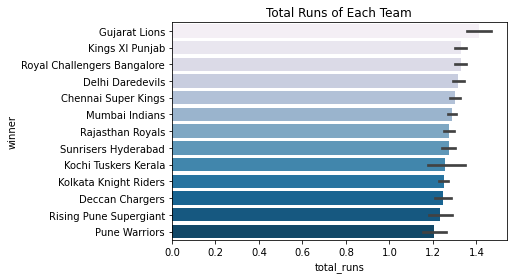

In [260]:
fig=plt.figure(figsize=(6,4))
orderdf=df.groupby(["winner"])["total_runs"].mean().sort_values(ascending=False).index
sns.barplot(y=df["winner"],x=df["total_runs"],order=orderdf,palette="PuBu").set(title="Total Runs of Each Team")
st.subheader("Total Runs Occured By Each Team")
st.pyplot(fig)

In [255]:
plt.figure(figsize=(20,8))
d=matches.groupby(matches["season"])["winner"].value_counts()
year=[]
winner=[]
count=[]
for i in d.iteritems():
        year.append(i[0][0])
        winner.append(i[0][1])
        count.append(i[1])

<Figure size 1440x576 with 0 Axes>

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

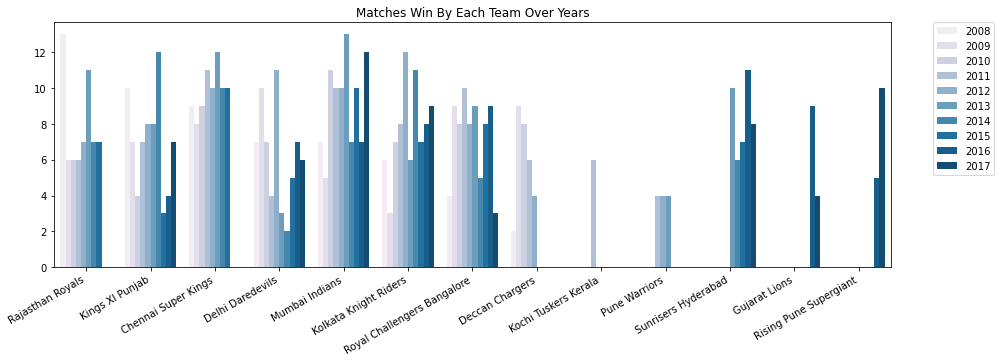

In [258]:
figure,axis=plt.subplots(figsize=(15,5))
figure.autofmt_xdate()

sns.barplot(x=winner,y=count,hue=year,palette="PuBu").set(title="Matches Win By Each Team Over Years")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
st.subheader("Winning Count of Each Team Over Years")
st.pyplot(figure)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

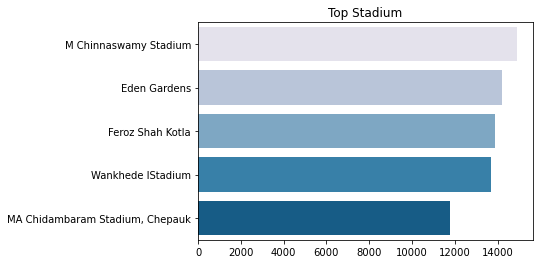

In [259]:
venue=df["venue"].value_counts()[:5]
count=venue.tolist()
venue1=["M Chinnaswamy Stadium","Eden Gardens","Feroz Shah Kotla","Wankhede lStadium","MA Chidambaram Stadium, Chepauk"]
fig=plt.figure(figsize=(6,4))
sns.barplot(y=venue1,x=count,palette="PuBu").set(title="Top Stadiums")
st.subheader("Top Stadium Where Most Matches Are Played")
st.pyplot(fig)


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

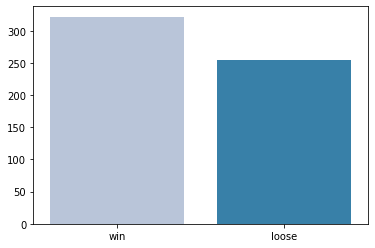

In [238]:
fig=plt.figure(figsize=(6,4))

s=[322, 255]
sns.barplot(x=["win","loose"],y=s,palette="PuBu").set(title="Win vs Loose")
st.subheader("Predicting Toss Winner Becomes Winner")
st.pyplot(fig)


<AxesSubplot:xlabel='count', ylabel='venue'>

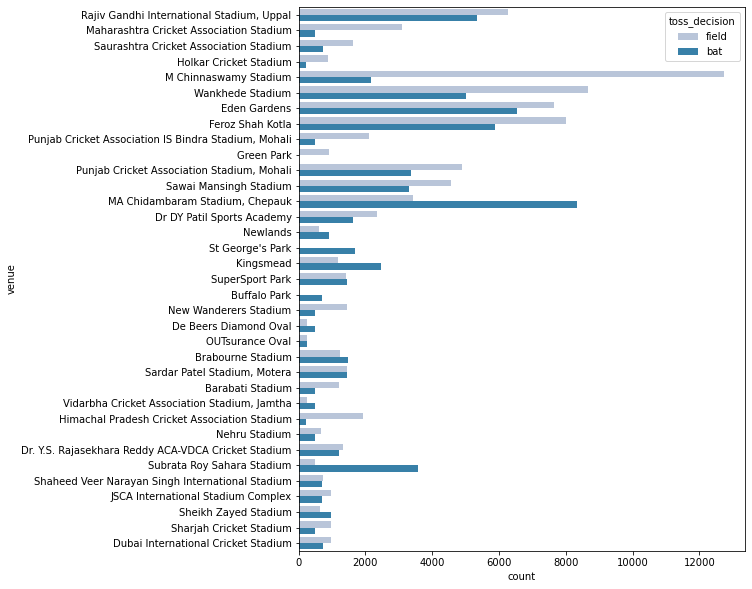

In [221]:
plt.figure(figsize=(6,4))
sns.countplot(y=df['venue'],hue=df['toss_decision'],palette ="PuBu")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

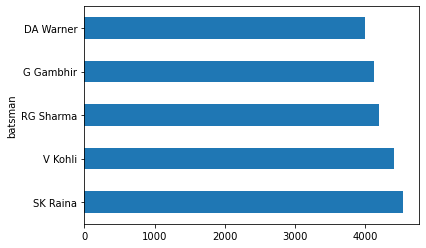

In [248]:
fig=plt.figure(figsize=(6,4))
d=df.groupby(df["batsman"])["batsman_runs"].sum()
d_sort=d.sort_values(ascending=False)[:5]
d_sort.plot(kind="barh")
st.subheader("Top 5 Batsman")
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

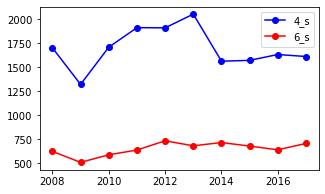

In [217]:
total_6s = df[df["batsman_runs"] == 6].groupby("season")["batsman_runs"].agg(['count'])
total_4s=df[df["batsman_runs"] == 4].groupby("season")["batsman_runs"].agg(['count'])

fig=plt.figure(figsize=(6,4))
plt.plot(total_4s,color='blue',marker='o')
plt.plot(total_6s,color='red',marker='o')

plt.legend(["4_s","6_s"])
st.subheader("Total 4_s and 6_s")
st.pyplot(fig)

In [218]:
total_6s_batsman = df[df["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count()
t6=total_6s_batsman.sort_values(ascending=False)[:5]
total_4s_batsman = df[df["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count()
t4=total_4s_batsman.sort_values(ascending=False)[:5]

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

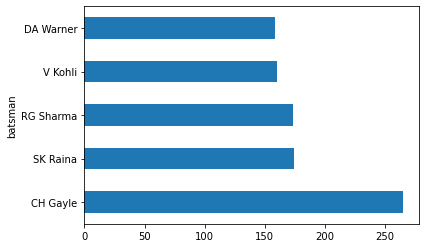

In [250]:
fig=plt.figure(figsize=(6,4))
t6.plot(kind="barh")
st.subheader("Top 5 batsman hit 4_s")
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

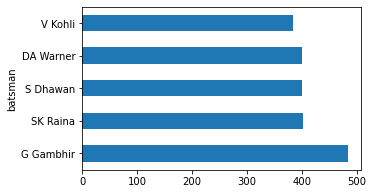

In [220]:
fig=plt.figure(figsize=(6,4))
t4.plot(kind="barh")
st.subheader("Top 5 batsman hit 6_s")
st.pyplot(fig)

In [152]:
runs=df.groupby(["season","batsman"])["batsman_runs"].sum()
raina=[]
kohli=[]
warner=[]
sharma=[]
gambir=[]
for i in runs.iteritems():
  if i[0][1]=="SK Raina":
    raina.append(i[1])
  if i[0][1]=="V Kohli":
    kohli.append(i[1])
  if i[0][1]=="DA Warner":
    warner.append(i[1])
  if i[0][1]=="RG Sharma":
    sharma.append(i[1])
  if i[0][1]=="G Gambhir":
    gambir.append(i[1])  
    

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

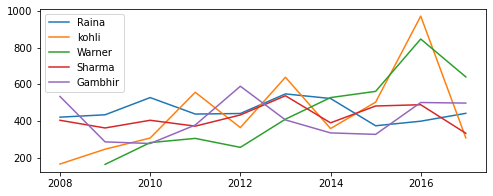

In [153]:
fig=plt.figure(figsize=(8,3))
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
sns.lineplot(y=raina,x=years)
sns.lineplot(y=kohli,x=years)
sns.lineplot(y=warner,x=[2009,2010,2011,2012,2013,2014,2015,2016,2017])
sns.lineplot(y=sharma,x=years)
sns.lineplot(y=gambir,x=years)
plt.plot(color=['red','blue','#772272','green','#FFAF00'],marker='o', figsize = (16,8))

plt.legend(["Raina","kohli","Warner","Sharma","Gambhir"])
st.subheader("top players")
st.pyplot(fig)

In [154]:
df["winner"].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [155]:
team=['--select--','Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala']

# PREDICTION

In [263]:
def prediction(team1,team2):
    p=(df[(df["team1"]==team1) & (df["team2"]==team2)])
    p1=(p["winner"].value_counts().sort_values(ascending=False))
    q=(df[(df["team1"]==team2) & (df["team2"]==team1)])
    q1=(q["winner"].value_counts().sort_values(ascending=False))
    if (len(p1)==2) or (len(q1)==2):
        if len(p1)==2:
            return p1.index[0],"Has High chance of Winning"
        elif len(q1)==2:
            return q1.index[0],"Has High chance of Winning"
    if (df[df["winner"]==team1].count()[0]) > (df[df["winner"]==team2].count()[0]):
        return team1,"Has High chance of Winning"
    else:
        return team2,"Has High chance of Winning" 

user_input1=st.selectbox("Enter Team1 ",team)
user_input2=st.selectbox("Enter Team2",team)
result=prediction(user_input1,user_input2)
st.subheader("PREDICTION")
st.title(result)  


('Sunrisers Hyderabad', 'Has High chance of Winning')
